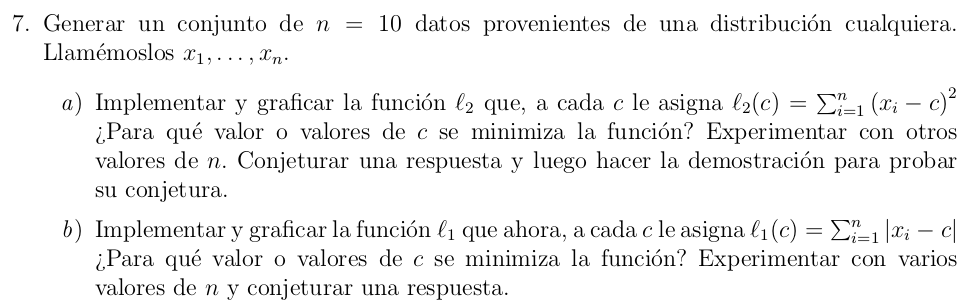

Éste me copa. Lo vimos con Daniela.

<details> 
  <summary>Spoiler :  </summary>
   es la esperanza.
</details>

In [358]:
# Genero los datos Normales con (mu=0.757, var=1)
n <- 10
datos <- rnorm(n, mean=0.757, sd=1)
head(datos)

[1] 0,8145922 0,8691720 1,0131409 0,9652356 0,9537067 0,5938230

In [359]:
# Distancia L2
l2 <- function(data, c){
    return (sum((data-c)**2))
}

In [360]:
# Distancia l2 de todos los puntos de datos con respecto al número 1.0
print("Distancia l2 a los datos para c = 1.0", quote = FALSE)
l2(datos, 1.0)

[1] Distancia l2 a los datos para c = 1.0


[1] 5,664682

In [361]:
# Defino una función que genere una grilla de valores para graficarlos
distancias_l2 <- function(data, desde=-2, hasta=2, step=0.01){
    distancias <- rep(0, (hasta-desde)/step)
    distancias <- data.frame (
        c = seq(desde, hasta, step),
        d = rep(0, length(c))
    )
    i <- 1
    for(c in distancias$c){
        distancias$c[i] <- c
        distancias$d[i] <- l2(data, c)
        i <- i+1
    }
    return (distancias)
}

In [362]:
distanciasL2Grid <- distancias_l2(datos)
head(distancias)

c,d
"-2,00","2776,551"
"-1,99","2766,611"
"-1,98","2756,671"
"-1,97","2746,731"
"-1,96","2736,791"
"-1,95","2726,851"


[1] Distancia(s) Mínima(s) para c = 


[1] 0,9

[1] Con distancia d = 


[1] 5,56448

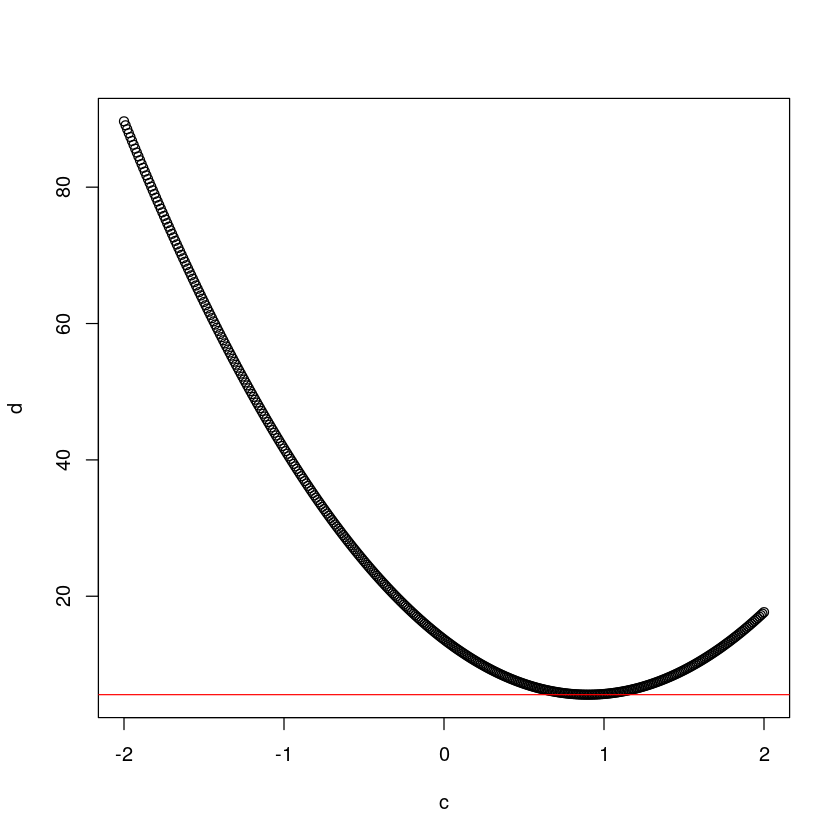

In [363]:
# Grafico la grilla de distancias L2
plot(distanciasL2Grid)
abline(h=min(distanciasL2Grid$d), col='red')

print("Distancia(s) Mínima(s) para c = ", quote = FALSE)
distancias$c[distanciasL2Grid$d == min(distanciasL2Grid$d)]
print("Con distancia d = ", quote = FALSE)
min(distanciasL2Grid$d)

In [364]:
# b) Same, con distancia L1

l1 <- function(data, c){
    return (sum(abs(data-c)))
}

distancias_l1 <- function(data, desde=-2, hasta=2, step=0.01){
    distancias <- rep(0, (hasta-desde)/step)
    distancias <- data.frame (
        c = seq(desde, hasta, step),
        d = rep(0, length(c))
    )
    i <- 1
    for(c in distancias$c){
        distancias$c[i] <- c
        distancias$d[i] <- l1(data, c)
        i <- i+1
    }
    return (distancias)
}

In [365]:
# Grilla de distancias L1
distanciasL1Grid <- distancias_l1(datos)
# Primeros elementos donde la distancia es minima
head(subset(distanciasL1Grid, d == min(distanciasL1Grid$d)))

,c,d
297,"0,96","4,669652"


[1] Distancia(s) Mínima(s) para c = 


[1] 0,96

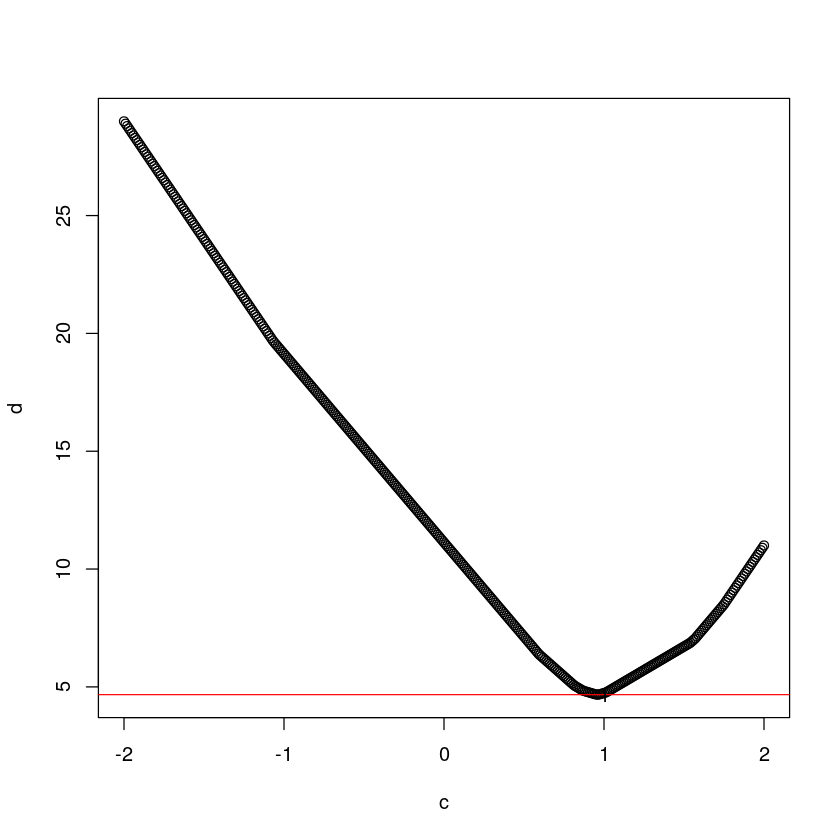

In [366]:
# Todas las distancias para los distintos 'c'
plot(distanciasL1Grid)
# Recta roja en el mínimo
abline(h=min(distanciasL1Grid$d), col='red')
text(min(distanciasL1Grid$d))

print("Distancia(s) Mínima(s) para c = ", quote = FALSE)
distancias$c[distanciasL1Grid$d == min(distanciasL1Grid$d)]

Los dos plots (L1 y L2) no parecen ser muy diferentes, hasta que...

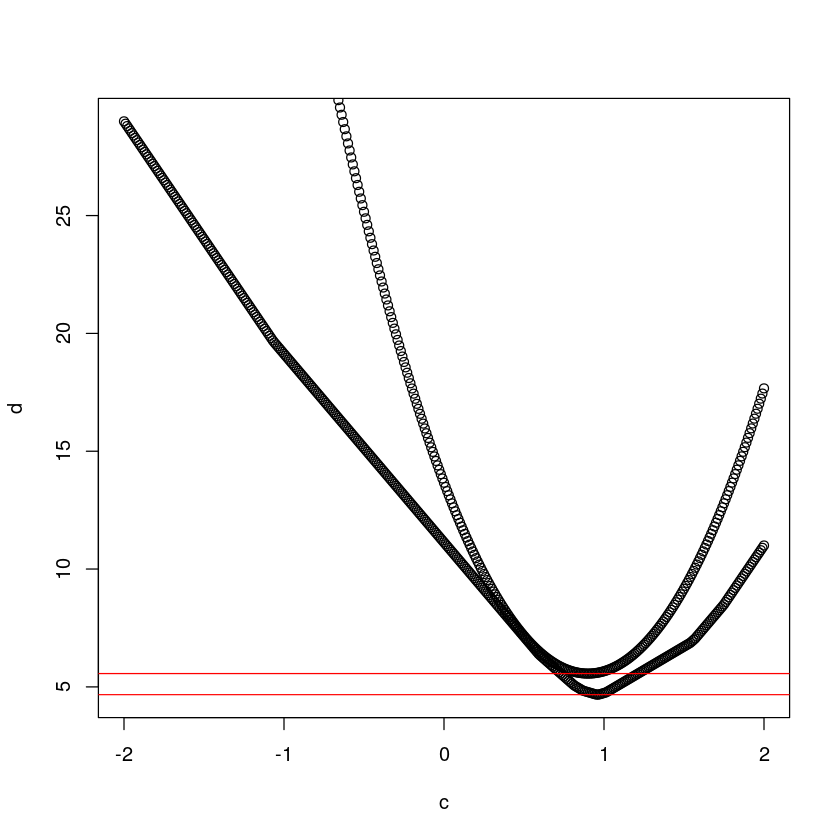

In [367]:
plot(distanciasL1Grid)
abline(h=min(distanciasL1Grid$d), col='red')

points(distanciasL2Grid)
abline(h=min(distanciasL2Grid$d), col='red')

**Observaciones:**

* **Altura mínima (en rojo):**
  
  Las diferencias de altura mínima en el eje d (distancias) se dan a partir de que la **distancia L2**
  
  $$l_2(\mathbb{x},c) = \sum_{x_i}^n (x - c)^2 $$
  
  **penaliza** *con más fuerza* los valores de la diferencia $(x - c)$ **mayores** a $1$, al **elevarlos al cuadrado**.
  
  Mientras que la **distancia L1**
  
  $$l_1(\mathbb{x},c) = \sum_{x_i}^n |x - c| $$
  
  conserva el **módulo de la diferencia** $(x - c)$ para **cualquier distancia**.

* **Amplitud**
  
  Las distancias L1 se visualizan en una curva más ***abierta/amplia*** que el gráfico de las distancias L2.
  
  Similarmente al punto anterior, L2 penaliza de forma cuadrática cada una de las diferencias en la suma.
  
  De esta manera, distancias cada vez más grandes linealmente
  
  $$d \in (2, 4, 6, 8, 10)$$
  
  son penalizadas cuadráticamente 
  
  $$d^2 \in (4, 8, 36, 64, 100)$$
  
  Mientras que para L1, el valor de la distancia no influye en su *peso*.

* ***Smoothness (suavidad)***
  
  No es casualidad que la curva cuadrática se vea "más continua" que la lineal, a pesar de haber considerado la **misma cantidad de valores para c** (misma cantidad de distancias / puntos graficados).
  
  Para observar mejor ésto, veamos qué sucede con **distintos valores de n:**

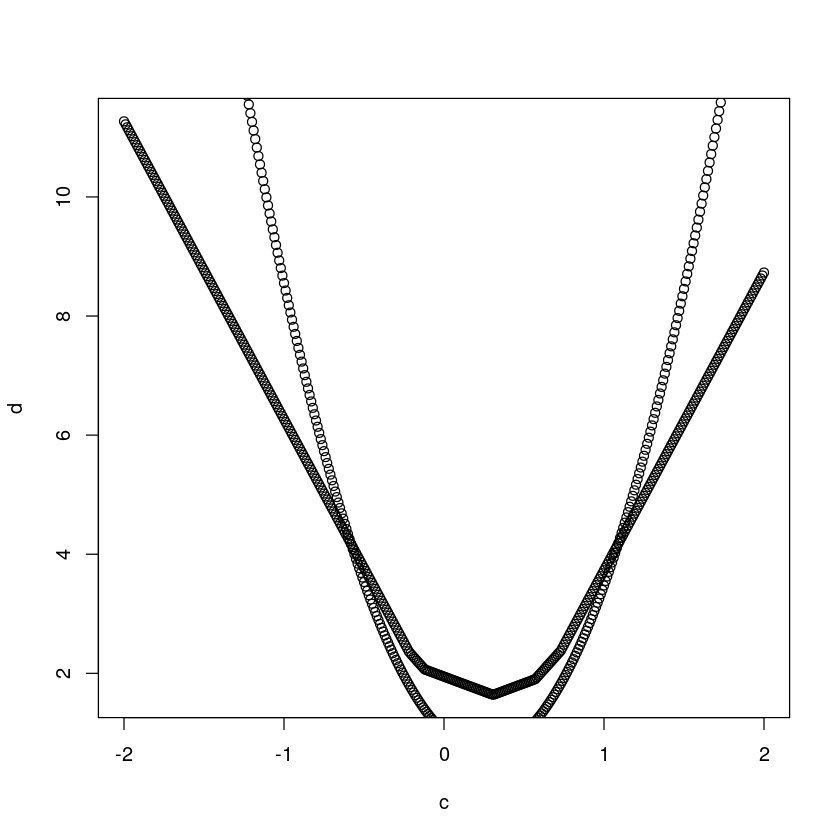

In [368]:
n <- 5
datos <- rnorm(n, mean=0.757, sd=1)
distanciasL2Grid <- distancias_l2(datos)
distanciasL1Grid <- distancias_l1(datos)
plot(distanciasL1Grid)
points(distanciasL2Grid)

* Notar la cantidad de ángulos, a qué se corresponde?

* Qué pasaría con n=1 : una **muestra de un solo dato**?

[1] Dato de la muestra:
[1] 0,5418643


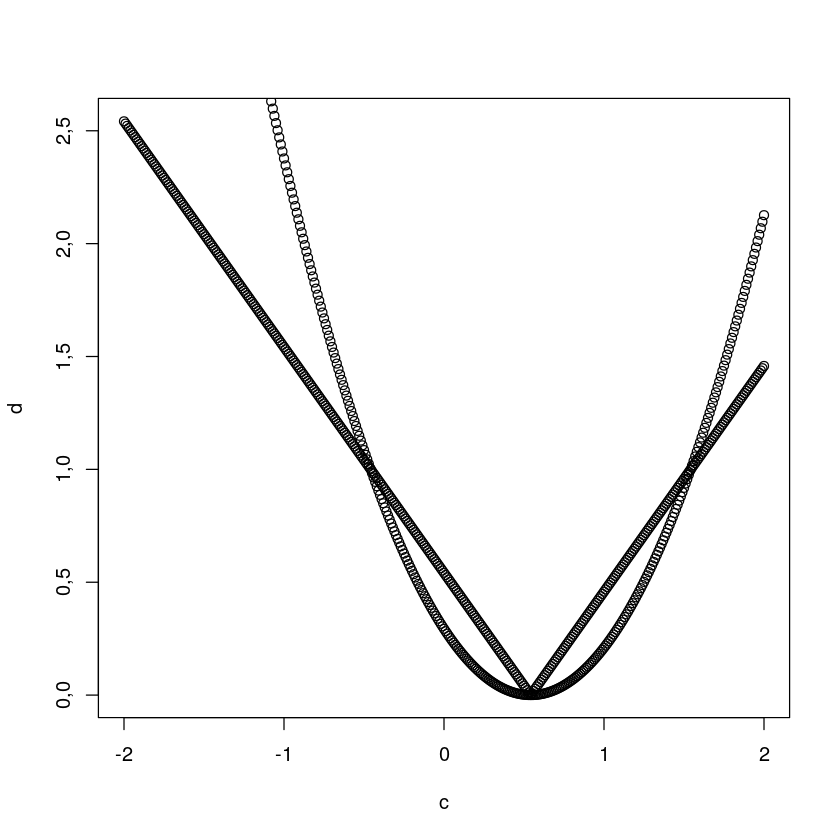

In [369]:
n <- 1
datos <- rnorm(n, mean=0.757, sd=1)
distanciasL2Grid <- distancias_l2(datos)
distanciasL1Grid <- distancias_l1(datos)
plot(distanciasL1Grid)
points(distanciasL2Grid)

print("Dato de la muestra:", quote=FALSE)
print(datos)

* *Puede deducir cuál corresponde a la distancia l2 y cuál a la distancia l1?*


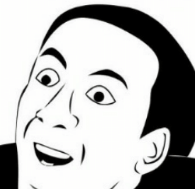

* **Observar** cómo la **distancia es mínima** (cero) cuando $c$ **es igual** al valor de la muestra.

De la misma forma, para una muestra de $n=2$

[1] Datos de la muestra (azul):
[1] -0,2320658  1,4660752


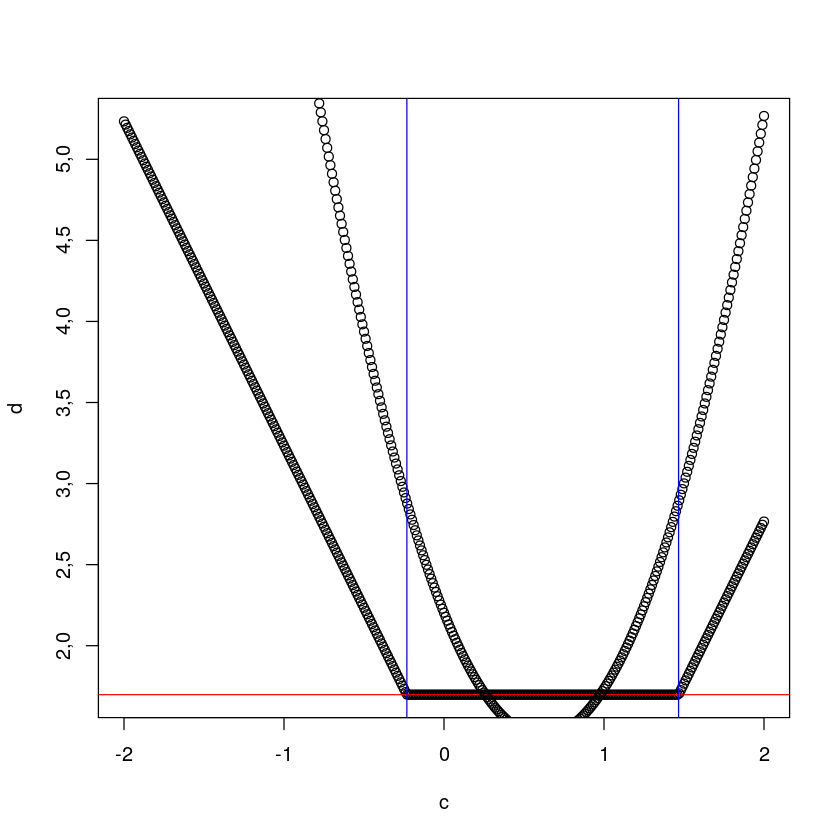

In [373]:
n <- 2
datos <- rnorm(n, mean=0.757, sd=1)
distanciasL2Grid <- distancias_l2(datos)
distanciasL1Grid <- distancias_l1(datos)
plot(distanciasL1Grid)
abline(h=min(distanciasL1Grid$d), col='red')
points(distanciasL2Grid)
abline(h=min(distanciasL2Grid$d), col='red')

print("Datos de la muestra (azul):", quote=FALSE)
print(datos)
abline(v=datos, col='blue')


* Si aún no es claro, podemos pensar en lo que sucede con éste último caso de solo 2 dos datos.
  
  Qué pasa a medida que movemos el $c$ desde $-2$ a $2$ ?
  
  Recordamos, distancia L1:
  
  $$l_1(\mathbb{x},c) = \sum_{x_i}^n |x - c| $$
  
  Para nuestro caso de dos `datos`:
  
  $$l_1(\mathbb{datos},c) = |x_1 - c| + |x_2 - c|$$
  
  Para $x_1, x_2$ fijo, si movemos $c$ entre $x_1$ y $x_2$, la suma de las dos distancias $d_1, d_2$ será la misma para todo $c \in  [x_1, x_2]$
  
  > para un $c$ en el medio:
  >
  > $$ \frac {x_1 |-----| c |------| x_2} {\  |---d_1---|---d_2---| \ } $$
  >
  
  > para un $c$ menor:
  >
  > $$ \frac {x_1 |--| c |---------| x_2} {\  |-d_1-|-------d_2---| \ } $$
  >
  
  > para un $c$ mayor:
  >
  > $$ \frac {x_1 |----------| c |-| x_2} {\  |---d_1-------|-d_2-| \ } $$
  >
  
  Vemos que **la suma de las distancias son siempre las mismas** (entre $x_1$ y $x_2$)
  
  De esta manera, **la norma L1**, obtendrá la **misma suma de distancia para todos los valores de $c$ entre cada par de datos.**
  
  Es por eso que vemos "ángulos" o descontinuidades en la curva L1 para los valores correspondientes a cada uno de los datos $x_i$.
  

 
  
  

* Y con la norma L2?
  
  $$l_2(\mathbb{x},c) = \sum_{x_i}^n (x - c)^2 $$
  
  Para nuestro caso de dos `datos`:
  
  $$l_2(\mathbb{datos},c) = (x_1 - c)^2 + (x_2 - c)^2$$
  
  Aquí, a medida que movemos $c$ entre $x_1$ y $x_2$, **obtenemos distancias muy distintas entre sí**, de forma que la suma de dos cuadrados:
  
  $$d_{l2} = d_1^2 + d_2^2$$
  
  **sólo dará el mismo valor** en el caso que $d_1$ y $d_2$ **toman valores intercambiados**, o el mismo (justo en el centro de $x_1$ y $x_2$):
  
  >
  > $$ \frac {x_1 |-----| c |------| x_2} {\  |---d_1^2---|---d_2^2---| \ } $$
  >
  
  Ésta es una propiedad muy interesante de las **funciones cuadráticas de distancia** (o ***error, loss, risk, energy, objetivo***, etc.) que, entre otras cosas, devuelve curvas contínuas y diferenciables que nos permiten minimizarlas con una alta variedad de eficientes herramientas (***derivando e igualando a cero o "Newton's method", gradient descent***, etc).

Para finalizar, veamos qué sucede cuando aumentamos la cantidad de datos $n$

[1] Cantidad de datos de la muestra:
[1] 1000


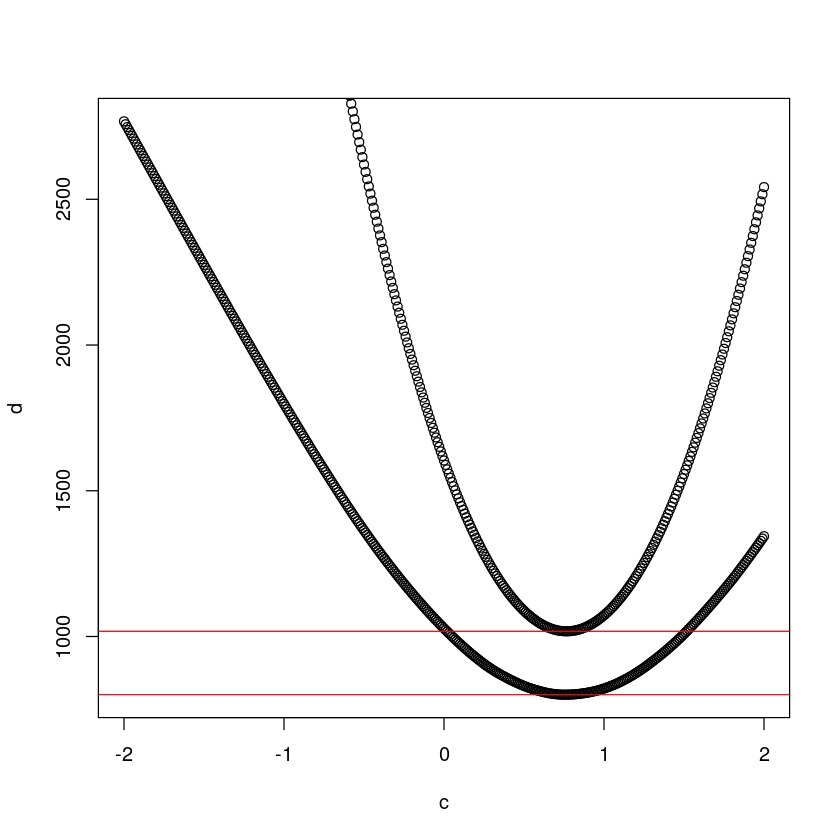

In [378]:
n <- 1000
datos <- rnorm(n, mean=0.757, sd=1)
distanciasL2Grid <- distancias_l2(datos)
distanciasL1Grid <- distancias_l1(datos)
plot(distanciasL1Grid)
abline(h=min(distanciasL1Grid$d), col='red')
points(distanciasL2Grid)
abline(h=min(distanciasL2Grid$d), col='red')

print("Cantidad de datos de la muestra:", quote=FALSE)
print(length(datos))
#abline(v=datos, col='blue')


Como era de esperarse, la distancia **L1** da la **apariencia** de una curva contínua, aunque ahora ya sabemos que **son 1001 rectas unidas**, una **curva con 1000 discontinuidades**, y **sin importar que tan grande sea n**, **siempre serán rectas**.

La **distancia L2 será siempre contínua*, sin importar el $n$

---

$$Fin$$

---